In [264]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pypianoroll
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
from music_generator.midi import play_pianoroll, sample_multitrack
from music_generator.data import get_npz_data

In [185]:
mtrack = get_npz_data(1, '../raw_data/lpd_5/lpd_5_cleansed')[0]
piano = mtrack.tracks[1]

In [186]:
X, y = sample_multitrack(mtrack, piano, 4, 4)

In [213]:
X.shape

(65, 96, 128)

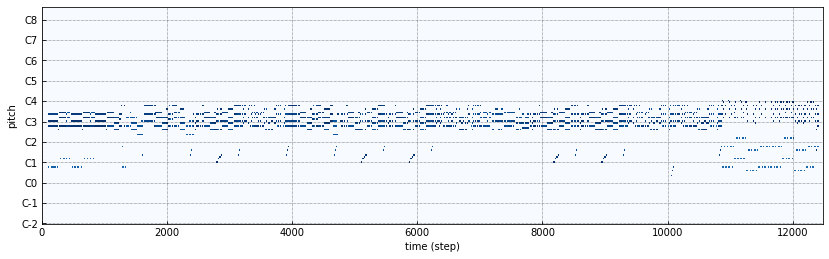

In [291]:
fig, ax = plt.subplots(figsize=(14,4))
pypianoroll.plot_pianoroll(ax=ax, pianoroll=piano.pianoroll);

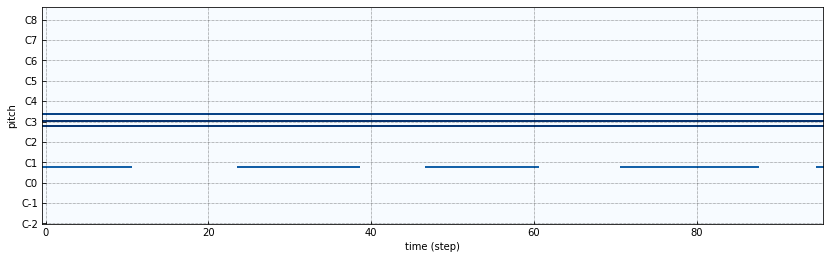

In [187]:
fig, ax = plt.subplots(figsize=(14,4))
pypianoroll.plot_pianoroll(ax=ax, pianoroll=X[1]);

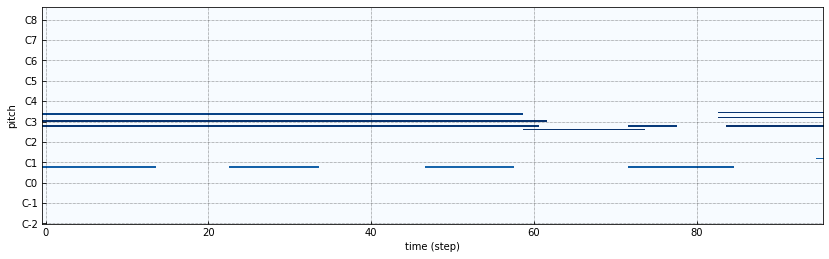

In [251]:
fig, ax = plt.subplots(figsize=(14,4))
pypianoroll.plot_pianoroll(ax=ax, pianoroll=y[1]);

In [227]:
X.shape

(65, 96, 128)

In [280]:
df = pd.DataFrame(y[0])
print(df.nunique(axis=0).to_dict())

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 4, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1}


In [ ]:
[sample, time, note] => input shape?

In [296]:
def init_model(X, y):
    input_shape = X[0].shape
    output_shape = y[0].shape[1]
    print (input_shape, output_shape)
    model = models.Sequential()
    model.add(layers.SimpleRNN(128, return_sequences=True, activation='relu', input_shape=input_shape))
    model.add(layers.SimpleRNN(128, return_sequences=True, activation='relu'))
    model.add(layers.Dense(128, activation='linear'))
    model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.001))
    return model

model = init_model(X, y)
model.summary()

(96, 128) 128
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 96, 128)           32896     
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 96, 128)           32896     
                                                                 
 dense_10 (Dense)            (None, 96, 128)           16512     
                                                                 
Total params: 82,304
Trainable params: 82,304
Non-trainable params: 0
_________________________________________________________________


In [331]:
history = model.fit(X, y, validation_split=0.2, epochs=200, batch_size=16)

Epoch 1/200
4/4 [==============================] - 0s 42ms/step - loss: 138.2181 - val_loss: 126.2918
Epoch 2/200
4/4 [==============================] - 0s 32ms/step - loss: 137.3392 - val_loss: 121.6802
Epoch 3/200
4/4 [==============================] - 0s 32ms/step - loss: 137.0039 - val_loss: 123.6553
Epoch 4/200
4/4 [==============================] - 0s 32ms/step - loss: 139.7072 - val_loss: 127.9900
Epoch 5/200
4/4 [==============================] - 0s 31ms/step - loss: 144.2349 - val_loss: 125.7459
Epoch 6/200
4/4 [==============================] - 0s 33ms/step - loss: 138.3633 - val_loss: 125.2617
Epoch 7/200
4/4 [==============================] - 0s 34ms/step - loss: 137.4057 - val_loss: 131.0203
Epoch 8/200
4/4 [==============================] - 0s 35ms/step - loss: 137.3007 - val_loss: 126.0097
Epoch 9/200
4/4 [==============================] - 0s 30ms/step - loss: 135.2442 - val_loss: 163.1170
Epoch 10/200
4/4 [==============================] - 0s 33ms/step - loss: 172.7048 

4/4 [==============================] - 0s 34ms/step - loss: 115.0246 - val_loss: 100.2284
Epoch 81/200
4/4 [==============================] - 0s 31ms/step - loss: 114.2432 - val_loss: 112.0981
Epoch 82/200
4/4 [==============================] - 0s 39ms/step - loss: 118.6371 - val_loss: 102.3172
Epoch 83/200
4/4 [==============================] - 0s 34ms/step - loss: 111.2865 - val_loss: 111.1560
Epoch 84/200
4/4 [==============================] - 0s 36ms/step - loss: 128.8230 - val_loss: 105.4924
Epoch 85/200
4/4 [==============================] - 0s 34ms/step - loss: 119.1988 - val_loss: 142.5719
Epoch 86/200
4/4 [==============================] - 0s 33ms/step - loss: 134.2409 - val_loss: 102.1032
Epoch 87/200
4/4 [==============================] - 0s 35ms/step - loss: 116.0438 - val_loss: 111.9787
Epoch 88/200
4/4 [==============================] - 0s 36ms/step - loss: 114.9647 - val_loss: 130.5722
Epoch 89/200
4/4 [==============================] - 0s 33ms/step - loss: 117.5661 - va

4/4 [==============================] - 0s 32ms/step - loss: 100.2604 - val_loss: 97.9309
Epoch 160/200
4/4 [==============================] - 0s 31ms/step - loss: 107.7102 - val_loss: 96.8648
Epoch 161/200
4/4 [==============================] - 0s 32ms/step - loss: 96.4091 - val_loss: 95.1720
Epoch 162/200
4/4 [==============================] - 0s 33ms/step - loss: 102.0170 - val_loss: 128.0405
Epoch 163/200
4/4 [==============================] - 0s 33ms/step - loss: 119.3102 - val_loss: 100.9949
Epoch 164/200
4/4 [==============================] - 0s 34ms/step - loss: 109.4387 - val_loss: 200.9801
Epoch 165/200
4/4 [==============================] - 0s 34ms/step - loss: 143.0087 - val_loss: 103.9041
Epoch 166/200
4/4 [==============================] - 0s 32ms/step - loss: 102.5989 - val_loss: 97.3136
Epoch 167/200
4/4 [==============================] - 0s 32ms/step - loss: 98.2954 - val_loss: 94.7124
Epoch 168/200
4/4 [==============================] - 0s 32ms/step - loss: 95.1364 - v

In [332]:
pred = model.predict(X[0:10])
pred.astype(np.uint8)
pred[0].shape

(96, 128)

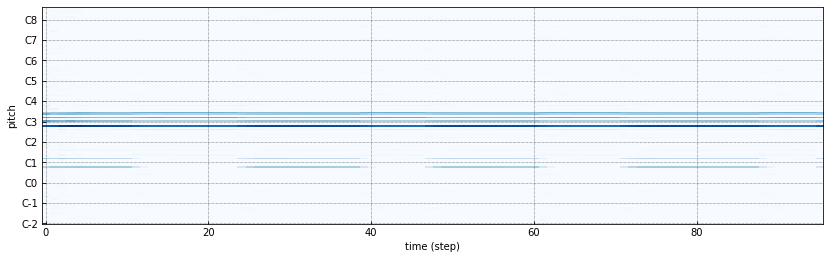

In [341]:
fig, ax = plt.subplots(figsize=(14,4))
pypianoroll.plot_pianoroll(ax=ax, pianoroll=pred[1]);

In [342]:
play_pianoroll(mtrack, pred[1])